Intersection Point:
x = 1.2424
Probability = 0.6341


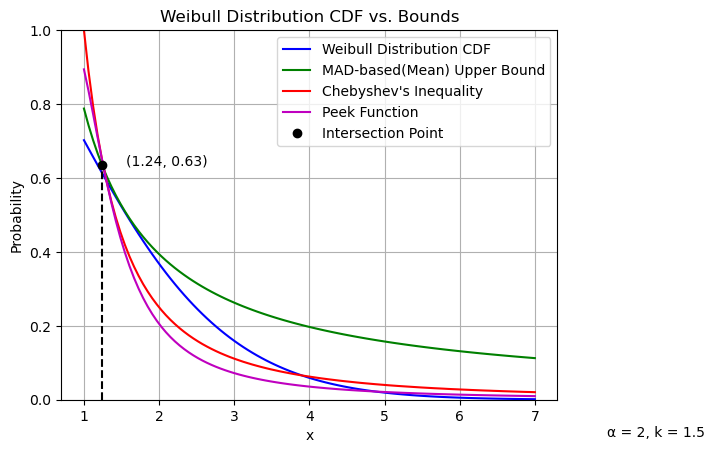

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def weibull_cdf(x, k, alpha):
    return 1 - np.exp(-(x / alpha) ** k)

def mad_upper_bound_weibull(x, k, alpha):
    # Calculate the inner gamma function argument
    inner_gamma_arg = gamma(1/k)
    
    # Calculate the second gamma function argument
    second_gamma_arg = gamma(1 + 1/k)**k
    
    # Calculate the incomplete gamma function
    # https://www.johndcook.com/blog/gamma_python/

    incomplete_gamma = gammaincc(1/k, second_gamma_arg) * gamma(1/k)

    
    # Calculate H
    mad_value = (2 * alpha / k) * incomplete_gamma
    variance = alpha**2 * (gamma(1 + 2 / k) - (gamma(1 + 1 / k))**2)
    x_sigma = np.sqrt(variance)
    return mad_value / (x_sigma * x)

def chebyshev_inequality(x):
    return np.round(1 / (np.array(x) ** 2), 4)

def peek_weibull(x, k, alpha):
    inner_gamma_arg = gamma(1/k)
    
    second_gamma_arg = gamma(1 + 1/k)**k


    incomplete_gamma = gammaincc(1/k, second_gamma_arg) * gamma(1/k)

    
    # Calculate H
    mad_value = (2 * alpha / k) * incomplete_gamma
    delta = mad_value / sigma
    return (1 - delta**2) / (x**2 - 2 * x * delta + 1)

k_param = 1.5
alpha_param = 2
mean = alpha_param * gamma(1 + 1 / k_param)

sigma_squared = alpha_param**2 * (gamma(1 + 2 / k_param) - (gamma(1 + 1 / k_param))**2)
sigma = np.sqrt(sigma_squared)

x = np.linspace(1, 7, 100)

weibull_cdf_vals = 1 - weibull_cdf(x, k_param, alpha_param)
mad_bounds_weibull = mad_upper_bound_weibull(x, k_param, alpha_param)
chebyshev_bounds = chebyshev_inequality(x)
peek_line_weibull = peek_weibull(x, k_param, alpha_param)

intersection_index = np.argmin(np.abs(mad_bounds_weibull - chebyshev_bounds))
intersection_x = x[intersection_index]
intersection_prob = mad_bounds_weibull[intersection_index]

print("Intersection Point:")
print("x =", np.round(intersection_x, 4))
print("Probability =", np.round(intersection_prob, 4))

plt.plot(x, weibull_cdf_vals, 'b-', label="Weibull Distribution CDF")
plt.plot(x, mad_bounds_weibull, 'g-', label="MAD-based(Mean) Upper Bound")
plt.plot(x, chebyshev_bounds, 'r-', label="Chebyshev's Inequality")
plt.plot(x, peek_line_weibull, 'm-', label="Peek Function")
plt.plot(intersection_x, intersection_prob, 'ko', label="Intersection Point")
plt.ylim(0, 1)

plt.plot([intersection_x, intersection_x], [0, intersection_prob], 'k--')  # Vertical dashed line
plt.xlabel('x')
plt.ylabel('Probability')
plt.title("Weibull Distribution CDF vs. Bounds")
plt.legend()
plt.grid(True)
plt.text(intersection_x + 1.4, intersection_prob, f'({np.round(intersection_x, 2)}, {np.round(intersection_prob, 2)})', ha='right')
plt.text(1.1, -0.1, f'α = {alpha_param}, k = {k_param}', ha='left', transform=plt.gca().transAxes)
plt.show()


Intersection Point:
x = 1.303
Probability = 0.593


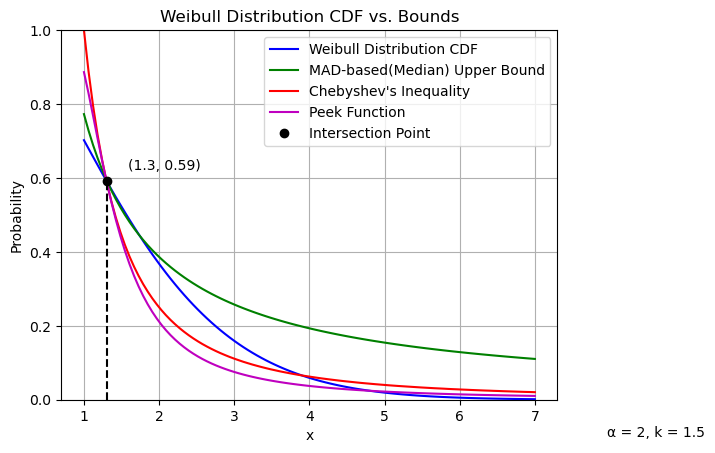

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def weibull_cdf(x, k, alpha):
    return 1 - np.exp(-(x / alpha) ** k)

def mad_upper_bound_weibull(x, k, alpha):
    log_2 = np.log(2)
    term1 = (log_2)**(1/k)
    term2 = (1/k) * gamma(1/k)
    term3 = (2/k) * gamma(1/k) * gammaincc(1/k, log_2)
    
    mad_value = alpha * (term1 - term2 + term3)
    variance = alpha**2 * (gamma(1 + 2 / k) - (gamma(1 + 1 / k))**2)
    x_sigma = np.sqrt(variance)
    return mad_value / (x_sigma * x)

def chebyshev_inequality(x):
    return np.round(1 / (np.array(x) ** 2), 4)

def peek_weibull(x, k, alpha):
    log_2 = np.log(2)
    term1 = (log_2)**(1/k)
    term2 = (1/k) * gamma(1/k)
    term3 = (2/k) * gamma(1/k) * gammaincc(1/k, log_2)
    
    mad_value = alpha * (term1 - term2 + term3)
    delta = mad_value / sigma
    return (1 - delta**2) / (x**2 - 2 * x * delta + 1)

k_param = 1.5
alpha_param = 2
mean = alpha_param * gamma(1 + 1 / k_param)

sigma_squared = alpha_param**2 * (gamma(1 + 2 / k_param) - (gamma(1 + 1 / k_param))**2)
sigma = np.sqrt(sigma_squared)

x = np.linspace(1, 7, 100)

weibull_cdf_vals = 1 - weibull_cdf(x, k_param, alpha_param)
mad_bounds_weibull = mad_upper_bound_weibull(x, k_param, alpha_param)
chebyshev_bounds = chebyshev_inequality(x)
peek_line_weibull = peek_weibull(x, k_param, alpha_param)

intersection_index = np.argmin(np.abs(mad_bounds_weibull - chebyshev_bounds))
intersection_x = x[intersection_index]
intersection_prob = mad_bounds_weibull[intersection_index]

print("Intersection Point:")
print("x =", np.round(intersection_x, 4))
print("Probability =", np.round(intersection_prob, 4))

plt.plot(x, weibull_cdf_vals, 'b-', label="Weibull Distribution CDF")
plt.plot(x, mad_bounds_weibull, 'g-', label="MAD-based(Median) Upper Bound")
plt.plot(x, chebyshev_bounds, 'r-', label="Chebyshev's Inequality")
plt.plot(x, peek_line_weibull, 'm-', label="Peek Function")
plt.plot(intersection_x, intersection_prob, 'ko', label="Intersection Point")
plt.ylim(0, 1)

plt.plot([intersection_x, intersection_x], [0, intersection_prob], 'k--')  # Vertical dashed line
plt.xlabel('x')
plt.ylabel('Probability')
plt.title("Weibull Distribution CDF vs. Bounds")
plt.legend()
plt.grid(True)
plt.text(intersection_x + 1.25, intersection_prob+0.03, f'({np.round(intersection_x, 2)}, {np.round(intersection_prob, 2)})', ha='right')
plt.text(1.1, -0.1, f'α = {alpha_param}, k = {k_param}', ha='left', transform=plt.gca().transAxes)
plt.show()


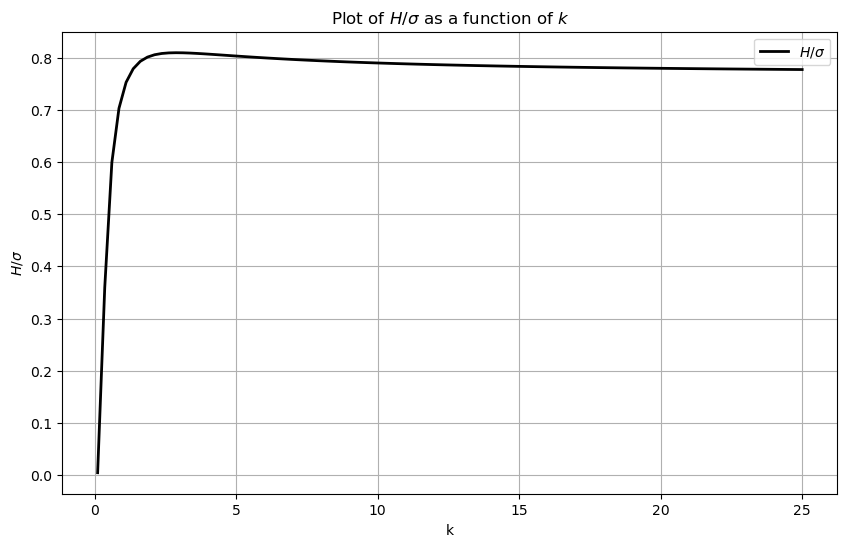

     k  H/sigma (%)
0    1         73.6
1    2         80.4
2    3         80.9
3    4         80.7
4    5         80.3
5   10         79.0
6   15         78.3
7   20         78.0
8   25         77.7
9   30         77.6
10  35         77.4


In [3]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc
import pandas as pd

def compute_H_over_sigma(alpha, k):

    
    # Calculate the second gamma function argument
    second_gamma_arg = gamma(1 + 1/k)**k
    
    # Calculate the incomplete gamma function
    incomplete_gamma = gammaincc(1/k, second_gamma_arg) * gamma(1/k)

    # Calculate H
    H = (2 * alpha / k) * incomplete_gamma
    sigma = alpha * np.sqrt(scipy.special.gamma(1 + 2/k) - (scipy.special.gamma(1 + 1/k) ** 2))
    
    return H / sigma

# Compute values over a range of k for the plot
k_values_plot = np.linspace(0.1, 25, 100)
alpha = 1.0
H_over_sigma_plot = compute_H_over_sigma(alpha, k_values_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, H_over_sigma_plot, color='black', label=r'$H/\sigma$',linewidth=2)
plt.xlabel('k')
plt.ylabel(r'$H/\sigma$')
plt.title(r'Plot of $H/\sigma$ as a function of $k$')
plt.grid(True)
plt.legend()
plt.show()

# Compute specific k values
specific_k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35]
H_over_sigma_specific = compute_H_over_sigma(alpha, np.array(specific_k_values)) * 100

# Create a dataframe for the table and round to 1 decimal place
df = pd.DataFrame({
    'k': specific_k_values,
    'H/sigma (%)': np.round(H_over_sigma_specific, 1)
})

print(df)


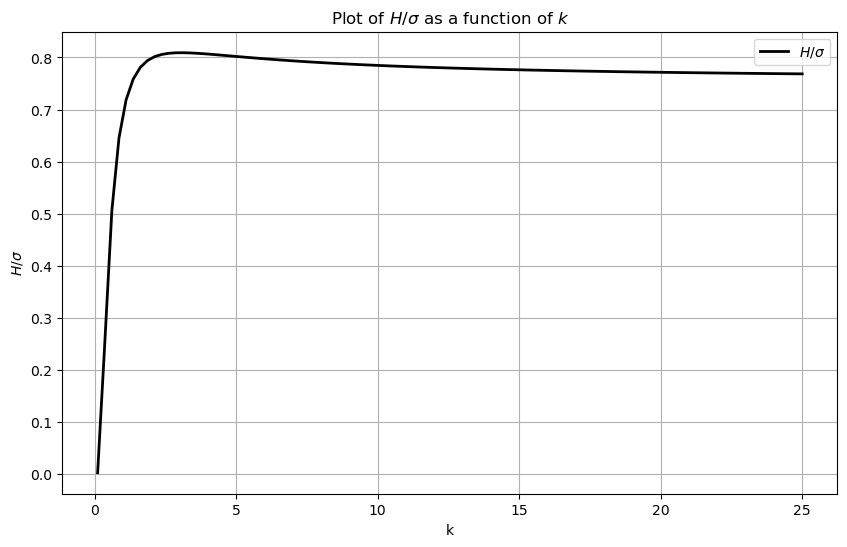

     k  H/sigma (%)
0    1         69.3
1    2         79.9
2    3         80.9
3    4         80.7
4    5         80.2
5   10         78.5
6   15         77.6
7   20         77.2
8   25         76.8
9   30         76.6
10  35         76.5


In [84]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from scipy.special import gamma, gammaincc
import pandas as pd

def compute_H_over_sigma(alpha, k):
    log_2 = np.log(2)
    term1 = (log_2)**(1/k)
    term2 = (1/k) * gamma(1/k)
    term3 = (2/k) * gamma(1/k) * gammaincc(1/k, log_2)
    
    H = alpha * (term1 - term2 + term3)
    sigma = alpha * np.sqrt(scipy.special.gamma(1 + 2/k) - (scipy.special.gamma(1 + 1/k) ** 2))
    
    return H / sigma

# Compute values over a range of k for the plot
k_values_plot = np.linspace(0.1, 25, 100)
alpha = 1.0
H_over_sigma_plot = compute_H_over_sigma(alpha, k_values_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, H_over_sigma_plot, color='black', label=r'$H/\sigma$', linewidth=2)
plt.xlabel('k')
plt.ylabel(r'$H/\sigma$')
plt.title(r'Plot of $H/\sigma$ as a function of $k$')
plt.grid(True)
plt.legend()
plt.show()

# Compute specific k values
specific_k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35]
H_over_sigma_specific = compute_H_over_sigma(alpha, np.array(specific_k_values)) * 100

# Create a dataframe for the table and round to 1 decimal place
df = pd.DataFrame({
    'k': specific_k_values,
    'H/sigma (%)': np.round(H_over_sigma_specific, 1)
})

print(df)
